# Analysing the Results from my Backtest on my training data

In [6]:
import pyfolio as pf
import pandas as pd
import matplotlib.pyplot as plt

My benchmark is going to be equivalent of having half my portfolio in BTC and the other half in ETH.

In [7]:
btc, eth = pd.read_csv('data/Bitcoin.csv', index_col='Date'), pd.read_csv('data/Ethereum.csv', index_col='Date')
btc.index, eth.index = pd.to_datetime(btc.index, utc=True), pd.to_datetime(eth.index, utc=True)
benchmark = 0.5*btc.Close.pct_change() + 0.5*eth.Close.pct_change()
benchmark.name = 'Benchmark'
benchmark = benchmark[:'2020-10-31']

Text(0.5, 1.0, 'Benchmark Portfolio Cumalative Returns')

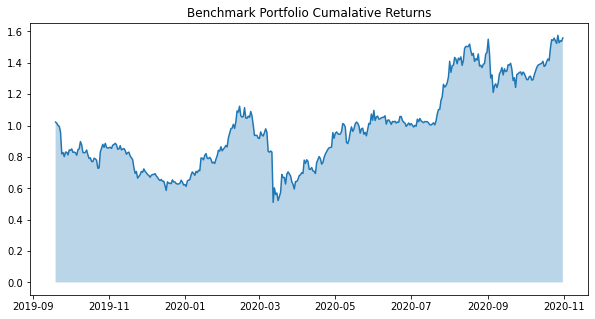

In [8]:
plt.figure(figsize=(10,5))
plt.plot((1+benchmark).cumprod())
plt.fill_between(benchmark.index,0,(1+benchmark[:'2020-10-31']).cumprod(), alpha=0.3)
plt.title("Benchmark Portfolio Cumalative Returns")

In [9]:
returns = pd.read_pickle("results/training/returns.pickle")
positions = pd.read_pickle("results/training/positions.pickle")
transactions = pd.read_pickle("results/training/transactions.pickle")

Start date,2019-09-18
End date,2020-10-30
Total months,19
,Backtest
Annual return,32.9%
Cumulative returns,57.9%
Annual volatility,18.8%
Sharpe ratio,1.61
Calmar ratio,4.03
Stability,0.91
Max drawdown,-8.2%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,6.98,2020-07-25,2020-07-28,2020-08-01,5
1,5.87,2020-08-04,2020-08-07,NaT,NaN
3,3.59,2020-02-18,2020-04-12,2020-04-16,43
2,3.5,2020-02-14,2020-02-15,2020-02-18,3
4,1.88,2020-04-18,2020-04-19,2020-04-25,5


/Users/ikennao/envs/backtest/lib/python3.8/site-packages/pandas/core/indexes/base.py:5277: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  start_slice, end_slice = self.slice_locs(start, end, step=step, kind=kind)


Stress Events,mean,min,max
New Normal,0.12%,-5.88%,11.45%


/Users/ikennao/envs/backtest/lib/python3.8/site-packages/pandas/core/indexes/base.py:5277: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  start_slice, end_slice = self.slice_locs(start, end, step=step, kind=kind)


Top 10 long positions of all time,max
Ethereum,113.56%


Top 10 short positions of all time,max
Bitcoin,-106.03%


Top 10 positions of all time,max
Ethereum,113.56%
Bitcoin,106.03%


/Users/ikennao/envs/backtest/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


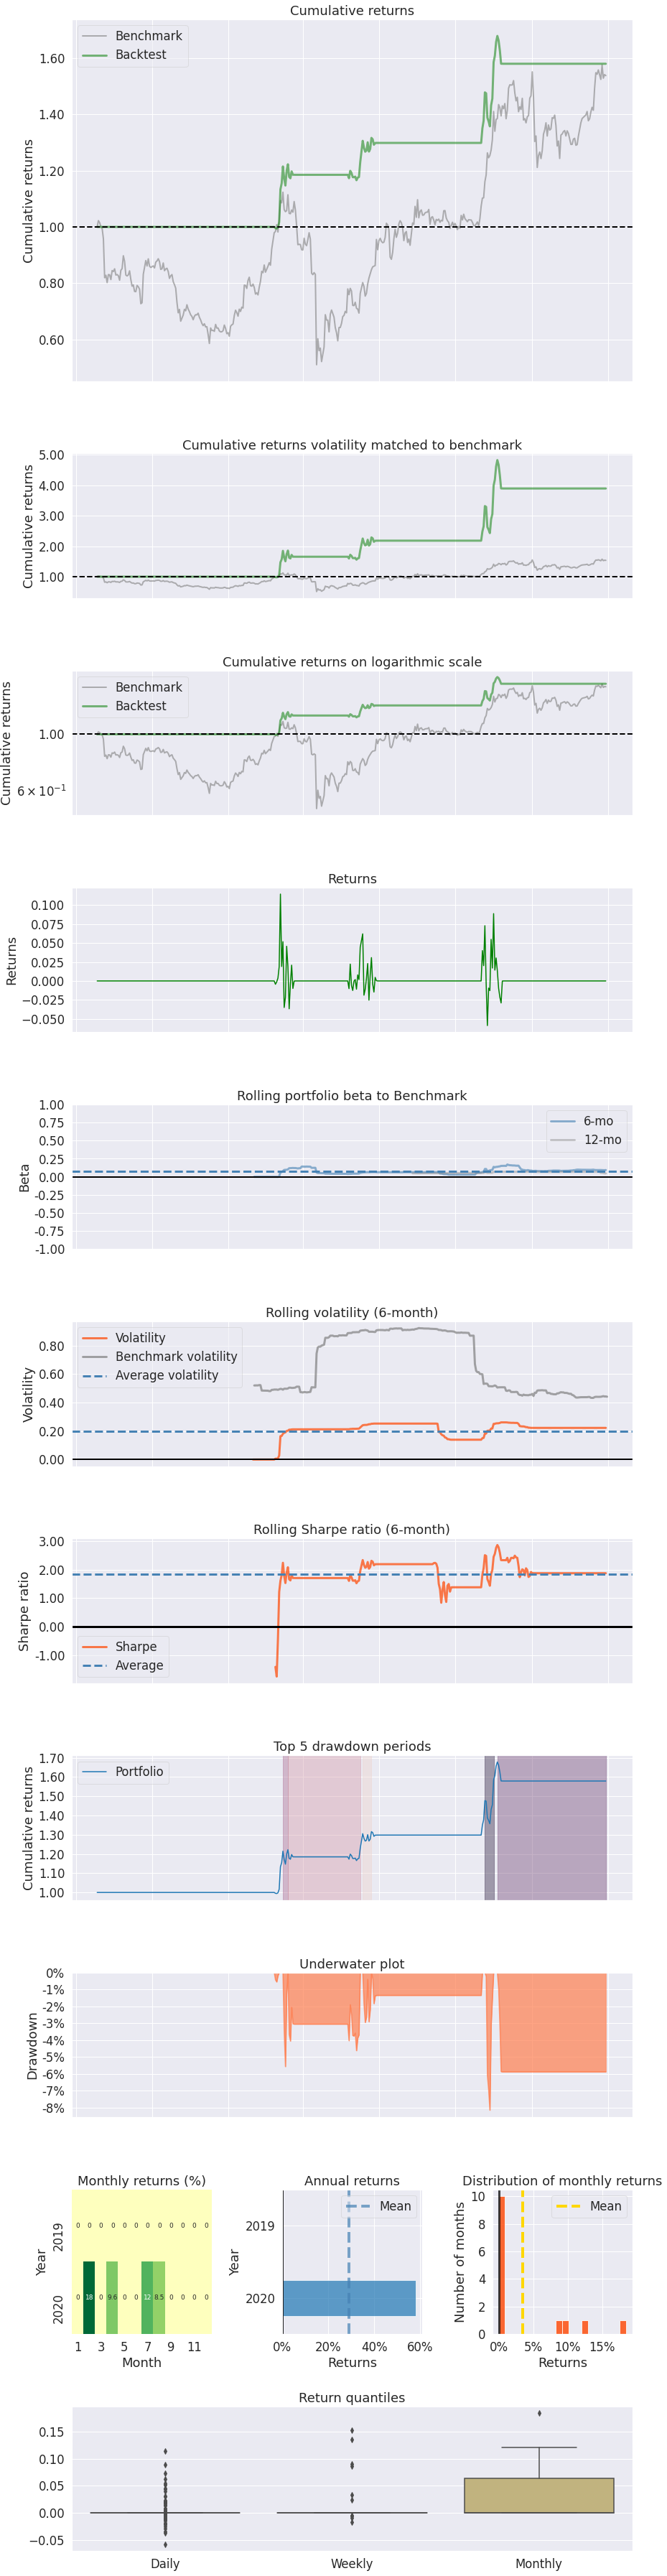

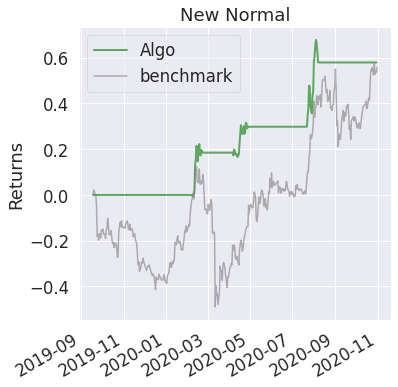

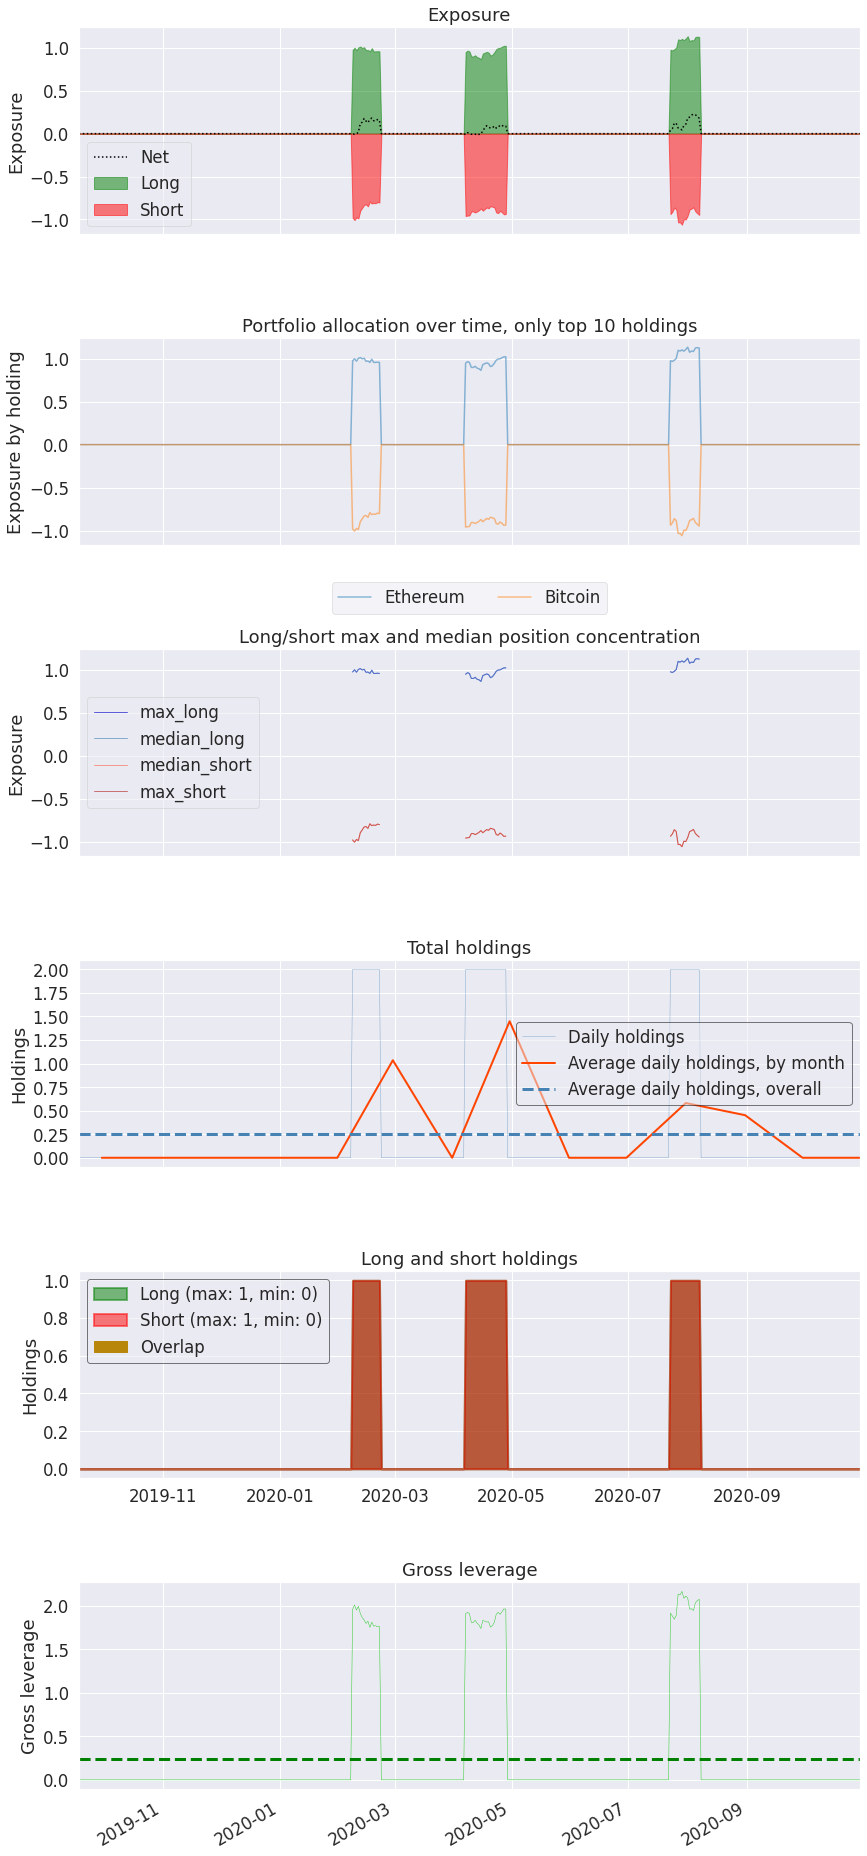

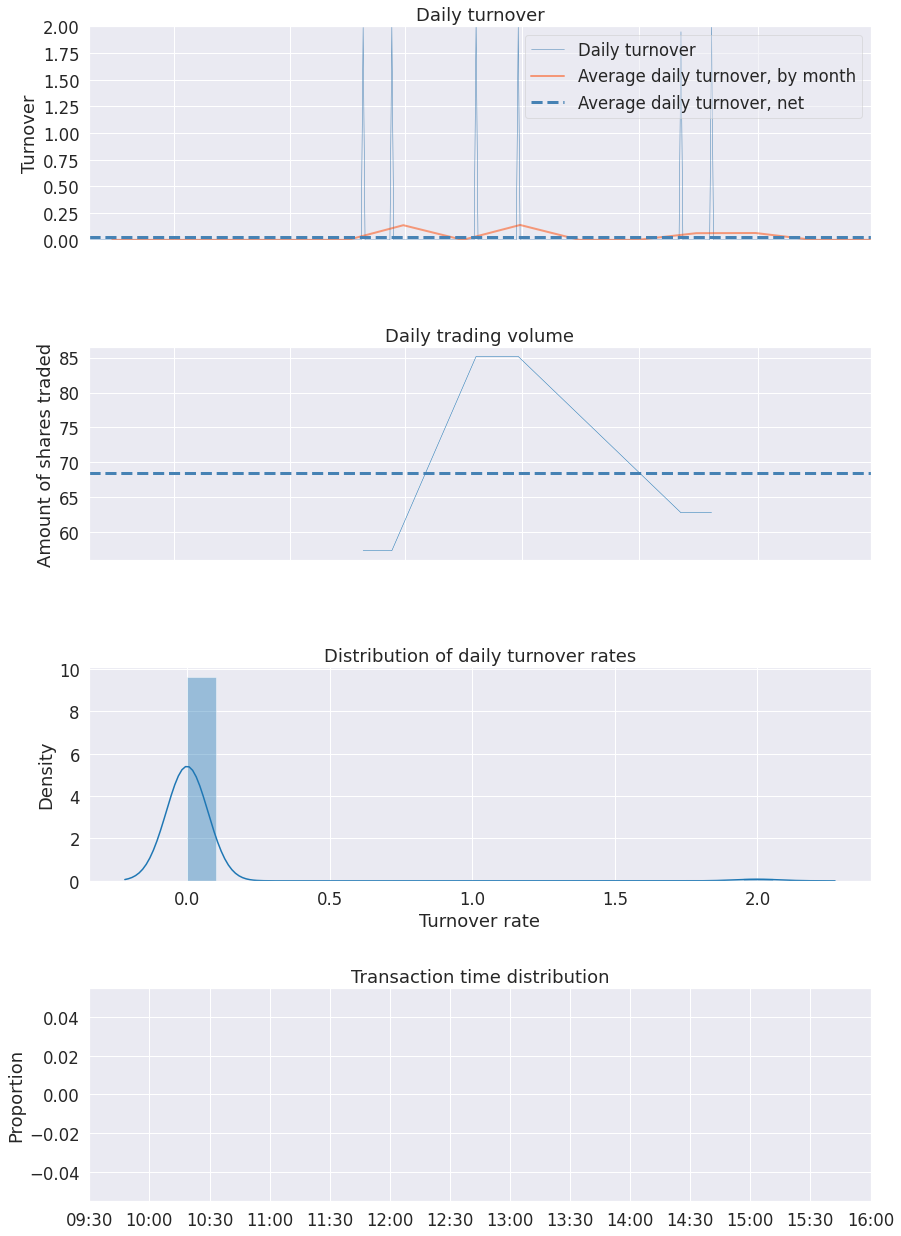

In [10]:
pf.create_full_tear_sheet(
    returns, 
    positions=positions, 
    transactions=transactions, 
    round_trips=False,
    benchmark_rets=benchmark,
)